<a href="https://colab.research.google.com/github/jcmacuacua/Dados_Hyperspetral/blob/main/C%C3%B3pia_de_Jaime_cnn_nova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adaptado de:

https://medium.com/techiepedia/binary-image-classifier-cnn-using-tensorflow-a3f5d6746697

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from random import randint
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

Num GPUs Available:  1


In [ ]:
train_path = "/content/drive/MyDrive/Leaf/train"
test_path = "/content/drive/MyDrive/Leaf/test"

dest_res = 150

batchsize = 32

label1 = 'healthy'
label2 = 'diseased'

In [ ]:
print(os.listdir(train_path))
print(os.listdir(test_path))

['diseased', 'healthy']
['diseased', 'healthy']


In [ ]:
print(os.listdir(train_path))
print(os.listdir(test_path))
import shutil
undesired_folder = '.ipynb_checkpoints'
for paths in (train_path,test_path):
    if undesired_folder in os.listdir(paths):
       shutil.rmtree(os.path.join(paths,undesired_folder))

print(os.listdir(train_path))
print(os.listdir(test_path))

['diseased', 'healthy']
['diseased', 'healthy']
['diseased', 'healthy']
['diseased', 'healthy']


In [ ]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(train_path,
                                          target_size=(dest_res,dest_res),
                                          batch_size = batchsize,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory(test_path,
                                          target_size=(dest_res,dest_res),
                                          batch_size = batchsize,
                                          class_mode = 'binary')

Found 1967 images belonging to 2 classes.
Found 512 images belonging to 2 classes.


In [ ]:
test_dataset.class_indices

{'diseased': 0, 'healthy': 1}

In [ ]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(dest_res,dest_res,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#steps_per_epoch = train_imagesize/batch_size
history = model.fit(train_dataset,
         steps_per_epoch = 50,
         epochs = 40,
         validation_data = test_dataset
         )

Epoch 1/40
50/50 [==============================] - 462s 9s/step - loss: 0.5923 - accuracy: 0.6481 - val_loss: 0.4327 - val_accuracy: 0.8477
Epoch 2/40
50/50 [==============================] - 75s 2s/step - loss: 0.3945 - accuracy: 0.8402 - val_loss: 0.2707 - val_accuracy: 0.8867
Epoch 3/40
50/50 [==============================] - 25s 495ms/step - loss: 0.2896 - accuracy: 0.8806 - val_loss: 0.2735 - val_accuracy: 0.9121
Epoch 4/40
50/50 [==============================] - 18s 354ms/step - loss: 0.3135 - accuracy: 0.8675 - val_loss: 0.1783 - val_accuracy: 0.9297
Epoch 5/40
50/50 [==============================] - 17s 339ms/step - loss: 0.2004 - accuracy: 0.9204 - val_loss: 0.1437 - val_accuracy: 0.9512
Epoch 6/40
50/50 [==============================] - 16s 322ms/step - loss: 0.1199 - accuracy: 0.9544 - val_loss: 0.0568 - val_accuracy: 0.9863
Epoch 7/40
50/50 [==============================] - 16s 315ms/step - loss: 0.0620 - accuracy: 0.9775 - val_loss: 0.0776 - val_accuracy: 0.9746
Epoc

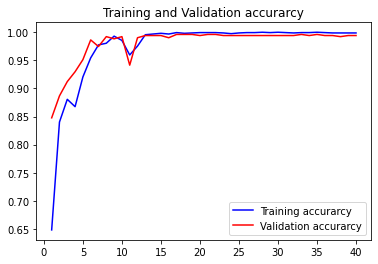

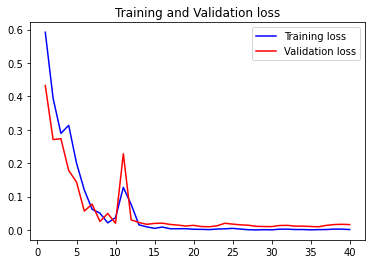

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()


#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


In [ ]:
history.history

{'accuracy': [0.6481364369392395,
  0.8401768803596497,
  0.880606472492218,
  0.8675000071525574,
  0.920404314994812,
  0.9543750286102295,
  0.9775000214576721,
  0.9804169535636902,
  0.9930511713027954,
  0.9854706525802612,
  0.9595704078674316,
  0.9753632545471191,
  0.9955779910087585,
  0.9968414306640625,
  0.9981048703193665,
  0.9968414306640625,
  0.9993749856948853,
  0.9981048703193665,
  0.998736560344696,
  0.9993749856948853,
  0.9993749856948853,
  0.9993683099746704,
  0.998736560344696,
  0.9974731802940369,
  0.998736560344696,
  0.9993683099746704,
  0.9993683099746704,
  1.0,
  0.9993683099746704,
  1.0,
  0.9993683099746704,
  0.998736560344696,
  0.9993683099746704,
  0.9993749856948853,
  1.0,
  0.9993749856948853,
  0.9987499713897705,
  0.998736560344696,
  0.998736560344696,
  0.998736560344696],
 'loss': [0.5922532081604004,
  0.39450737833976746,
  0.28955137729644775,
  0.31345057487487793,
  0.2004302442073822,
  0.11992574483156204,
  0.0619821362197

In [ ]:
def predictImage(filename,c1_name,c2_name):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)[0][0]
    print('pred_val: ',val)
    val = round(val)
    print('rounded: ',val)
    if val == 1:
        
        plt.xlabel(c1_name,fontsize=12)
        
    
    elif val == 0:
        
        plt.xlabel(c2_name,fontsize=12)


pred_val:  0.0
rounded:  0


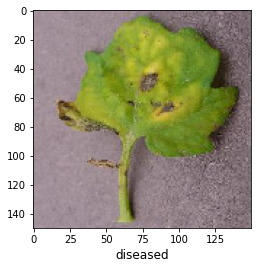

In [ ]:
subdirs = os.listdir(test_path)

random_folder = subdirs[randint(0,1)]

folder_path = os.path.join(test_path,random_folder)

images = os.listdir(folder_path)

random_image_path = os.path.join(folder_path,images[randint(0,len(images)-1)])

predictImage(random_image_path,label1,label2)


In [ ]:
os.listdir(folder_path)

['00f16858-f392-4d9e-ad9f-efab8049a13f___JR_Sept.L.S 8368.JPG',
 '0a70601b-8511-4a56-9562-c95c46372874___Matt.S_CG 1032.JPG',
 '0a5edec2-e297-4a25-86fc-78f03772c100___JR_Sept.L.S 8468.JPG',
 '0a76257e-6a78-459b-8f51-a266805121eb___Matt.S_CG 2527.JPG',
 '0b23b869-cfa6-40d7-a683-f4637d91ebff___Matt.S_CG 1286.JPG',
 '0a146952-538a-41e5-a422-b5d50e91771e___Matt.S_CG 6079.JPG',
 '0aa486df-97b6-4764-89a9-d193e16aabbb___Keller.St_CG 1931.JPG',
 '0af9f990-ad92-4411-8623-4498ca4805ce___Keller.St_CG 1942.JPG',
 '0c1aa7e5-a820-4fb8-8bc2-623a6056e749___JR_Sept.L.S 2659.JPG',
 '0c48052c-232b-4ea7-b77d-322f5f642612___Matt.S_CG 7724.JPG',
 '0bbf4db7-38a1-4d5c-8fd7-503e9f37ef8f___Matt.S_CG 7848.JPG',
 '0b6a9374-858d-49ce-8a94-ab57c957718c___Matt.S_CG 2488.JPG',
 '0b4886e5-a065-44c1-aa19-bd166922d3de___JR_Sept.L.S 8498.JPG',
 '0bcb24a9-bf45-4008-b9df-1c729f977b17___Matt.S_CG 7835.JPG',
 '0c4935b6-8f13-4148-b5e6-19404d49fc78___Matt.S_CG 2733.JPG',
 '0ca7ed02-4540-47df-b01d-194b23226a2d___Matt.S_CG 1733.

In [ ]:
#Confusion Matrix and Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
Y_pred = model.predict(train_dataset, test_dataset)
y_pred = np.argmax(Y_pred, axis=1)

In [ ]:
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(train_dataset.classes, y_pred))

print('Classification Report')
target_names = ['diseased', 'healthy']
print(classification_report(train_dataset.classes, y_pred, target_names=target_names))

Confusion Matrix
[[1118    0]
 [ 849    0]]
Classification Report
              precision    recall  f1-score   support

    diseased       0.57      1.00      0.72      1118
     healthy       0.00      0.00      0.00       849

    accuracy                           0.57      1967
   macro avg       0.28      0.50      0.36      1967
weighted avg       0.32      0.57      0.41      1967



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

X_train_dataset, X_test_dataset, y_test 